Full Name: Võ Thị Phương Anh

Student ID: 21522883

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


In [123]:
# importing lib before doing anything. below are libruaries used for all datasets
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline
sns.set_style('whitegrid')
import os

# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

##**Code** 

### Importing lib, pre-processing and describing our data

In [2]:
#importing Fish dataset
fish = pd.read_csv('/content/fish.csv')

In [3]:
fish.head()


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.tail()

,Weight,Length1,Length2,Length3,Height,Width
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672
158,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
fish.describe()


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
fish.shape

(159, 6)

In [7]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [8]:
fish.isna().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [9]:
fish.dropna()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [10]:
print(str('Is there any NaN value in the dataset: '), fish.isnull().values.any())

Is there any NaN value in the dataset:  False


### Some basic plot

In [11]:
fish.corr()


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


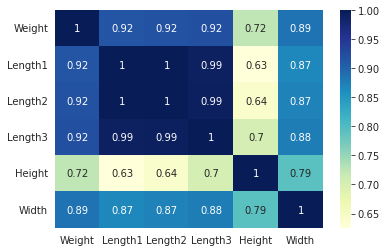

In [12]:
sns.heatmap(fish.corr(), annot=True, cmap='YlGnBu');

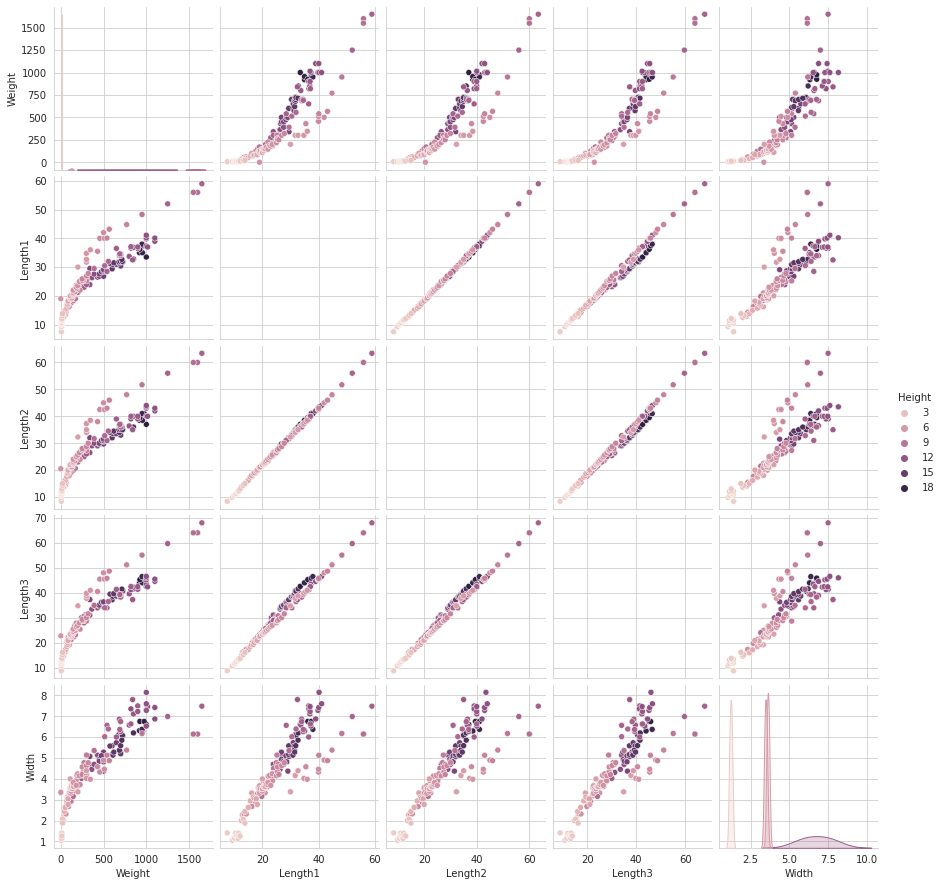

In [13]:
g=sns.pairplot(fish,hue='Height')
plt.show()

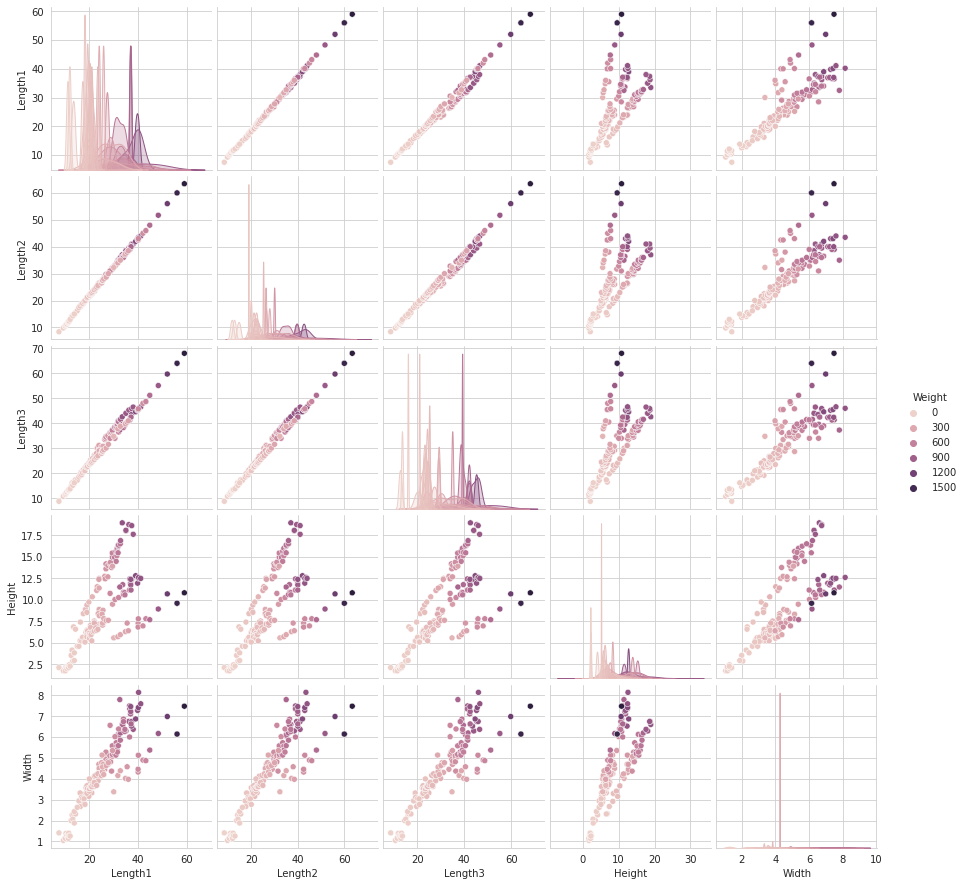

In [14]:
g=sns.pairplot(fish,hue='Weight')
plt.show()

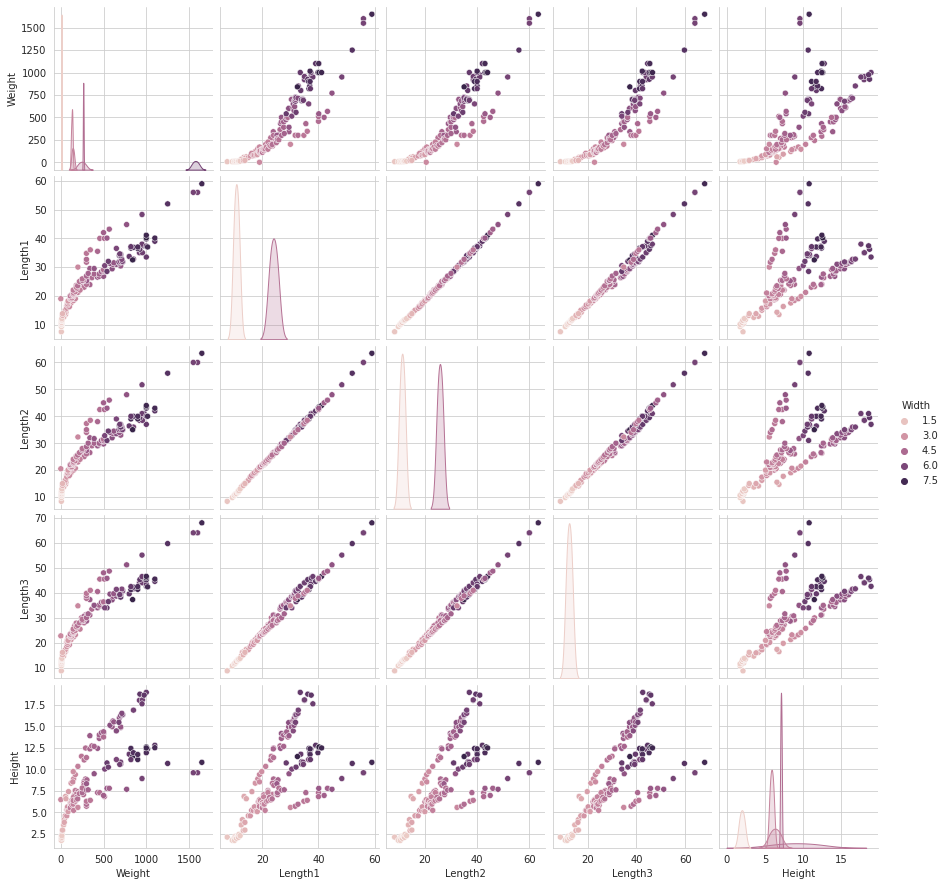

In [15]:
g=sns.pairplot(fish,hue='Width')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


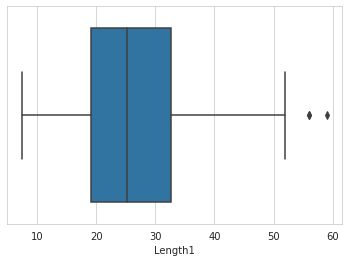

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


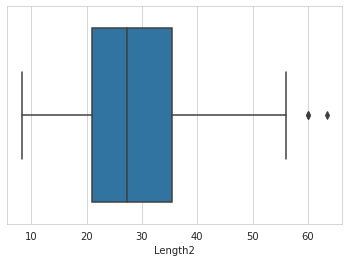

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


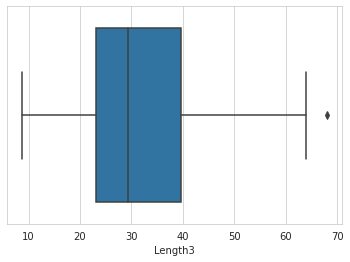

In [16]:
sns.boxplot(fish['Length1'])
plt.show()
sns.boxplot(fish['Length2'])
plt.show()
sns.boxplot(fish['Length3'])
plt.show()

### Outlier detect

In [17]:
#Weight
dfw = fish['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [18]:
#Length 1
dfl1 = fish['Length1']
dfl1_Q1 = dfl1.quantile(0.25)
dfl1_Q3 = dfl1.quantile(0.75)
dfl1_IQR = dfl1_Q3 - dfl1_Q1
dfl1_lowerend = dfl1_Q1 - (1.5 * dfl1_IQR)
dfl1_upperend = dfl1_Q3 + (1.5 * dfl1_IQR)

dfl1_outliers = dfl1[(dfl1 < dfl1_lowerend) | (dfl1 > dfl1_upperend)]
dfl1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [19]:
dfl2 = fish['Length2']
dfl2_Q1 = dfl2.quantile(0.25)
dfl2_Q3 = dfl2.quantile(0.75)
dfl2_IQR = dfl2_Q3 - dfl2_Q1
dfl2_lowerend = dfl2_Q1 - (1.5 * dfl2_IQR)
dfl2_upperend = dfl2_Q3 + (1.5 * dfl2_IQR)

dfl2_outliers = dfl2[(dfl2 < dfl2_lowerend) | (dfl2 > dfl2_upperend)]
dfl2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

In [20]:
dfl3 = fish['Length3']
dfl3_Q1 = dfl3.quantile(0.25)
dfl3_Q3 = dfl3.quantile(0.75)
dfl3_IQR = dfl3_Q3 - dfl3_Q1
dfl3_lowerend = dfl3_Q1 - (1.5 * dfl3_IQR)
dfl3_upperend = dfl3_Q3 + (1.5 * dfl3_IQR)

dfl3_outliers = dfl3[(dfl3 < dfl3_lowerend) | (dfl3 > dfl3_upperend)]
dfl3_outliers

144    68.0
Name: Length3, dtype: float64

**from results above we indicate that outliers of the dataset are possibly record 142 to 144.**

In [21]:
#Show outliers
fish[142:145]

,Weight,Length1,Length2,Length3,Height,Width
142,1600.0,56.0,60.0,64.0,9.600,6.144
143,1550.0,56.0,60.0,64.0,9.600,6.144
144,1650.0,59.0,63.4,68.0,10.812,7.480


In [22]:
#Drop them
fish_proc= fish.drop([142,143,144])

### Gradient Descent

In [23]:
features=['Length1','Length2','Length3','Height','Width']
X1=fish_proc[features]
y1=fish_proc['Weight']

In [24]:
#split training and testing data (train - test follows ratio 7:3, random state = student id = 21522883)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size = 0.3,random_state=21522883)

In [25]:
#standardize data
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.fit_transform(X_test1)

In [26]:
X_train1

array([[6.00490196e-01, 6.02771363e-01, 5.98272138e-01, 4.94996692e-01,
        8.15476009e-01],
       [2.15686275e-01, 2.14780600e-01, 2.37580994e-01, 3.29498624e-01,
        2.48220885e-01],
       [5.63725490e-01, 5.63510393e-01, 5.44276458e-01, 4.81849947e-01,
        7.59048288e-01],
       [6.64215686e-01, 6.60508083e-01, 6.58747300e-01, 5.13291852e-01,
        8.12284292e-01],
       [4.04411765e-01, 4.06466513e-01, 4.36285097e-01, 5.59511510e-01,
        4.86607007e-01],
       [2.00980392e-01, 2.07852194e-01, 2.09503240e-01, 1.65979824e-01,
        2.89224520e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.22653030e-02,
        5.50380257e-02],
       [1.22549020e-01, 1.22401848e-01, 1.27429806e-01, 1.04454221e-01,
        1.45322379e-01],
       [3.06372549e-01, 3.14087760e-01, 3.17494600e-01, 2.54321303e-01,
        3.78332977e-01],
       [2.52450980e-01, 2.58660508e-01, 2.59179266e-01, 1.97880269e-01,
        3.03778138e-01],
       [1.54411765e-01, 1.5242

In [27]:
#Gradient Descent
class LinearRegression_GD:
  def __init__ (self, eta = 0.01, max_iter = 200, random_state = 21522883):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = [ ]
  def net_input(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]
  def predict(self, X):
    return self.net_input(X)
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = [ ]
    for n_iters in range (self.max_iter):
      errors = y - self.predict(X)
      self.w[1:] += self.eta * X.T.dot(errors)
      self.w[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2
      self.costs.append(cost)

In [28]:
model_GD1 =LinearRegression_GD(eta=0.008, max_iter=200, random_state=21522883)
model_GD1.fit(X_train1, y_train1)
Y_pred1 = model_GD1.predict(X_test1)
accuracy_mse2_gd_fish = mean_squared_error(y_test1,Y_pred1)
accuracy_mse2_gd_fish

19406.243351067147

In [29]:
accuracy_r2_gd_fish = r2_score(y_test1,Y_pred1)
print("Final R2:" ,accuracy_r2_gd_fish)

Final R2: 0.837725834511516


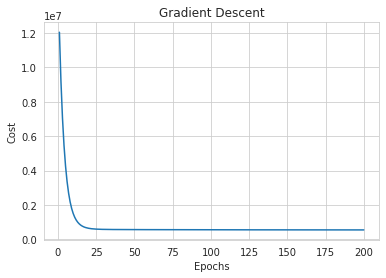

In [30]:
#Cost funtion
plt.plot(range(1, len(model_GD1.costs) + 1), model_GD1.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Normal Equation

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size = 0.3,random_state=21522883)

In [32]:
#standardize data
scaler = MinMaxScaler()
X_train1[['Height']] = scaler.fit_transform(X_train1[['Height']])
X_test1[['Height']] = scaler.fit_transform(X_test1[['Height']])

In [33]:
X_train1

,Length1,Length2,Length3,Height,Width
110,32.0,34.5,36.5,0.494997,6.3875
63,16.3,17.7,19.8,0.329499,2.6730
109,30.5,32.8,34.0,0.481850,6.0180
115,34.6,37.0,39.3,0.513292,6.3666
71,24.0,26.0,29.0,0.559512,4.2340
...,...,...,...,...,...
17,30.4,33.0,38.5,0.766725,5.1975
29,33.5,37.0,42.6,1.000000,6.6030
40,19.0,20.5,22.8,0.275519,3.3516
15,29.4,32.0,37.2,0.795747,5.5800


In [34]:
y_train1

110     556.0
63       90.0
109     514.0
115     690.0
71      300.0
        ...  
17      700.0
29     1000.0
40        0.0
15      600.0
98      188.0
Name: Weight, Length: 109, dtype: float64

In [35]:
model1=LinearRegression()

In [36]:
model1.fit(X_train1, y_train1)  
Y_pred1 = model1.predict(X_test1)

In [37]:
accuracy_mse_ne_fish = mean_squared_error(y_test1,Y_pred1)
accuracy_mse_ne_fish

12243.5743403688

In [38]:
accuracy_r2_ne_fish = r2_score(y_test1,Y_pred1)
accuracy_r2_ne_fish

0.8976197622209913

# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

## **Code** 

### Importing lib, pre-processing and describing our data

In [39]:
insurance=pd.read_csv('/content/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [41]:
insurance.shape

(1338, 7)

In [42]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [43]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [44]:
insurance.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Some basic plots

In [45]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


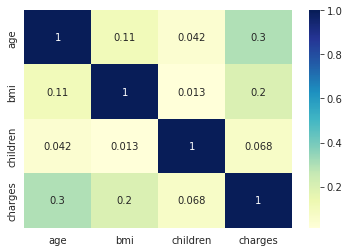

In [46]:
sns.heatmap(insurance.corr(), annot=True, cmap='YlGnBu');

In [47]:
def ScatterPlot(hue,title):
    fig, axes =plt.subplots(1,2, figsize=(12,4))
    fig.suptitle(title)
    sns.scatterplot(x='age',y='charges',hue=hue,data=insurance,ax=axes[0])
    sns.scatterplot(x='bmi',y='charges',hue=hue,data=insurance,ax=axes[1])
    fig.tight_layout()

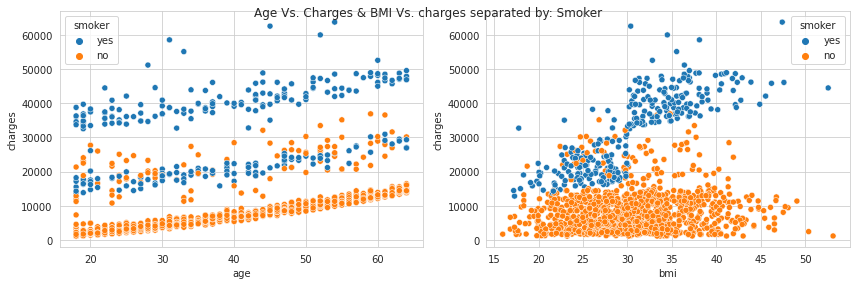

In [48]:
ScatterPlot('smoker','Age Vs. Charges & BMI Vs. charges separated by: Smoker')

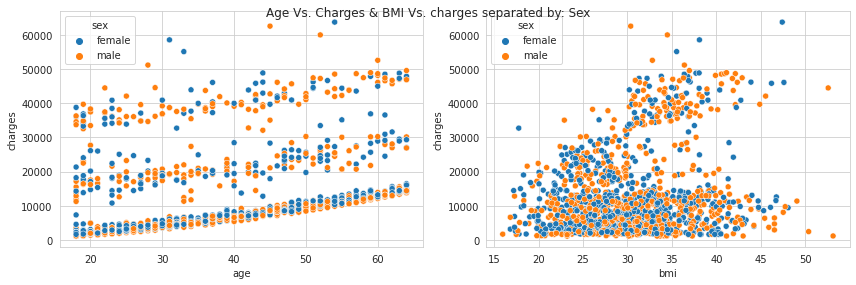

In [49]:
ScatterPlot('sex','Age Vs. Charges & BMI Vs. charges separated by: Sex')


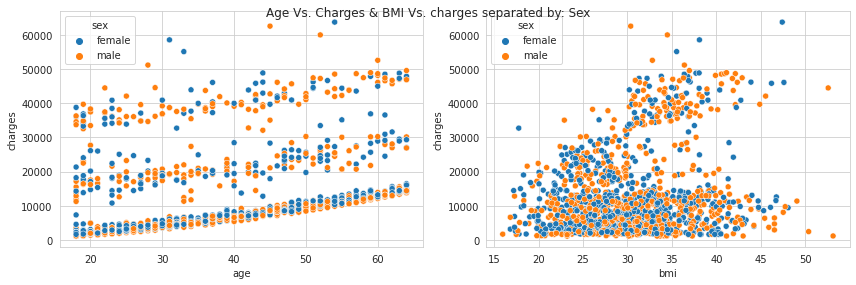

In [50]:
ScatterPlot('sex','Age Vs. Charges & BMI Vs. charges separated by: Sex')

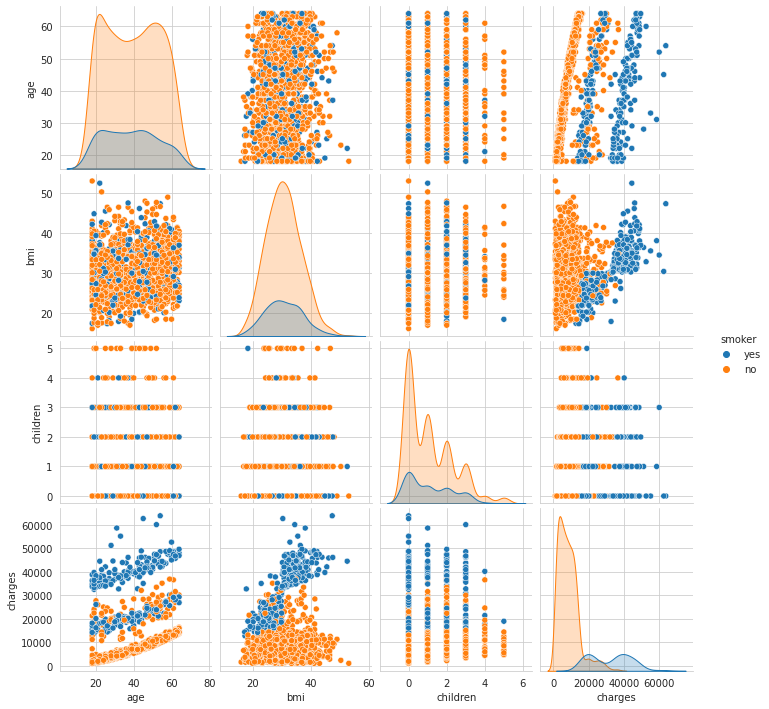

In [51]:
# Pair plot
sns.pairplot(insurance,hue="smoker")

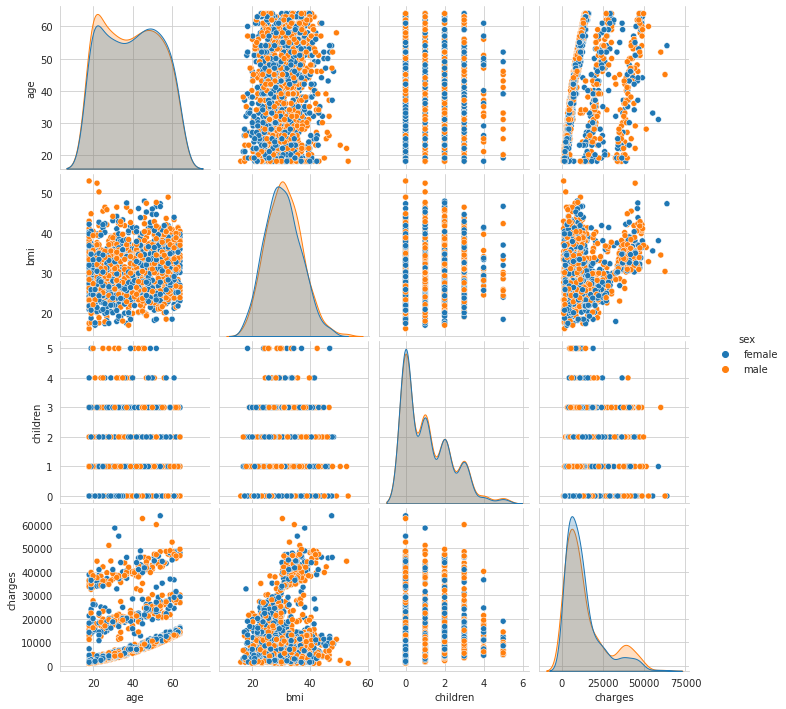

In [52]:
sns.pairplot(insurance,hue="sex")

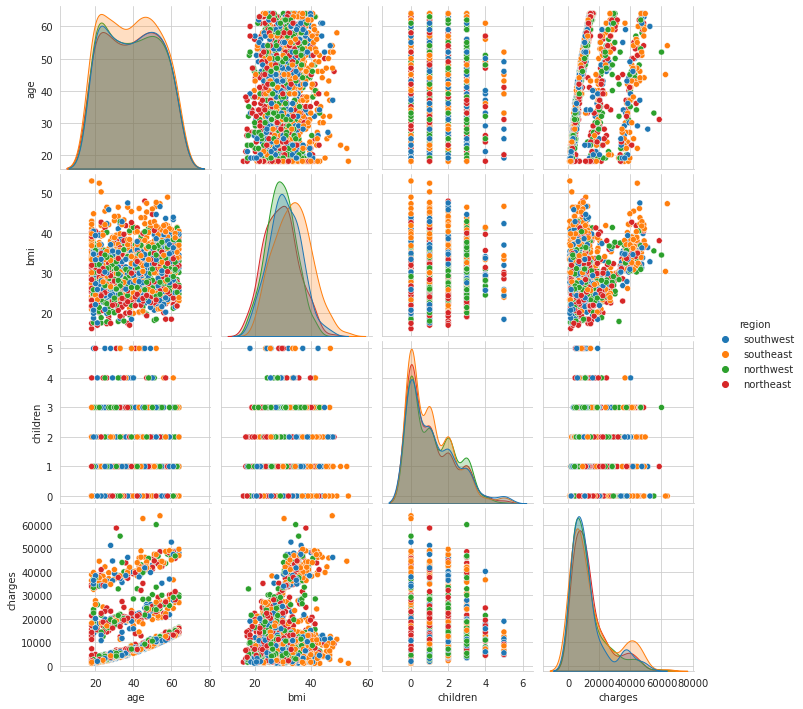

In [53]:
sns.pairplot(insurance,hue="region")

### Converting data

In [73]:
categorical_features=[feature for feature in insurance.columns if insurance[feature].dtypes=='O']
categorical_features

['sex', 'smoker', 'region']

In [74]:
numerical_features=[feature for feature in insurance.columns if insurance[feature].dtypes!='O']
numerical_features

['age', 'bmi', 'children', 'charges']

### Gradient Descent

In [75]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in categorical_features:
    lbl_encoders[feature]=LabelEncoder()
    insurance[feature]=lbl_encoders[feature].fit_transform(insurance[feature])

In [76]:
insurance_p = insurance.dropna()
X=insurance_p[['age','sex','bmi','children','smoker','region']]
y=insurance_p['charges']

In [77]:
#split training data
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3,random_state=21522883)

In [78]:
#standardize data
scaler2 = StandardScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

In [79]:
X_train2

array([[-0.58940916,  0.97885596,  1.22407489,  0.76062335, -0.50133512,
         0.44128465],
       [-0.16481683,  0.97885596, -1.28819781,  1.59525811, -0.50133512,
        -1.37428649],
       [ 0.54283707,  0.97885596,  2.68643063, -0.07401142, -0.50133512,
         0.44128465],
       ...,
       [-1.29706306,  0.97885596, -0.28392941, -0.90864618, -0.50133512,
        -0.46650092],
       [ 1.39202174,  0.97885596, -0.84692836, -0.90864618, -0.50133512,
        -0.46650092],
       [-1.50935922,  0.97885596,  1.04788745, -0.90864618, -0.50133512,
         0.44128465]])

In [80]:
#Gradient Descent
class LinearRegression_GD:
  def __init__ (self, eta = 0.05, max_iter = 200, random_state = 21522883):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = [ ]
  def net_input(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]
  def predict(self, X):
    return self.net_input(X)
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = [ ]
    for n_iters in range (self.max_iter):
      errors = y - self.predict(X)
      self.w[1:] += self.eta * X.T.dot(errors)
      self.w[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2
      self.costs.append(cost)

In [139]:
model_GD2 =LinearRegression_GD(eta=0.0009, max_iter=200, random_state=21522883)
model_GD2.fit(X_train2, y_train2)
Y_pred2 = model_GD2.predict(X_test2)
from sklearn.metrics import mean_squared_error
accuracy_mse2_insurance_gd = mean_squared_error(y_test2,Y_pred2)
accuracy_mse2_insurance_gd

39388298.06148799

In [140]:
accuracy_r2_insurance_gd = r2_score(y_test2,Y_pred2)
accuracy_r2_insurance_gd

0.7386680825029097

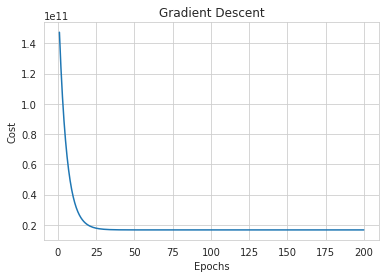

In [83]:
#cost function
plt.plot(range(1, len(model_GD2.costs) + 1), model_GD2.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Normal Equation

In [84]:
model2=LinearRegression()
model2.fit(X_train2, y_train2)  
Y_pred2 = model2.predict(X_test2)

In [85]:
accuracy_mse_insurance_ne = mean_squared_error(y_test2,Y_pred2)
accuracy_mse_insurance_ne

39388298.06148798

In [86]:
accuracy_r2_insurance_ne = r2_score(y_test2,Y_pred2)
accuracy_r2_insurance_ne

0.7386680825029097

# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

## **Code**

### Importing lib, data and describing

In [87]:
#importing dataset
tesla = pd.read_csv('/content/tesla_stock.csv')
tesla.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [88]:
tesla.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [89]:
tesla.shape

(2416, 5)

In [90]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2416 non-null   float64
 1   High    2416 non-null   float64
 2   Low     2416 non-null   float64
 3   Close   2416 non-null   float64
 4   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 94.5 KB


In [91]:
tesla.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [92]:
tesla.dropna()

,Open,High,Low,Close,Volume
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500
2412,575.690002,589.799988,567.429993,580.989990,17801500
2413,632.419983,650.880005,618.000000,640.809998,29005700
2414,640.000000,653.000000,632.520020,650.570007,15719300


### Some basic plots

In [121]:
tesla.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,1.000000


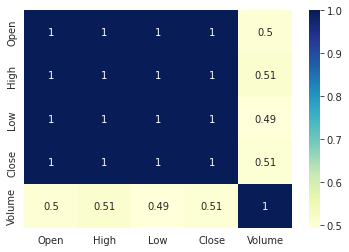

In [122]:
sns.heatmap(tesla.corr(), annot=True, cmap='YlGnBu');

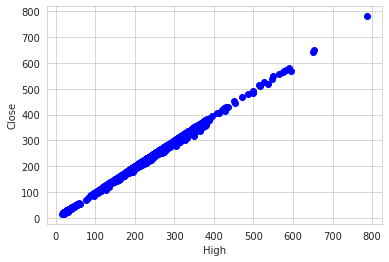

In [93]:
plt.scatter(tesla.High, tesla.Close,  color='blue')
plt.xlabel("High")
plt.ylabel("Close")
plt.show()

Text(0.5, 1.0, 'The General Trend of all values')

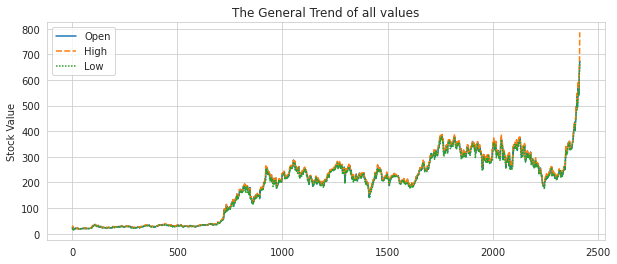

In [94]:
plt.figure(figsize=(10,4))
sns.lineplot(data=tesla.iloc[:,:-2])
plt.ylabel("Stock Value")
plt.title("The General Trend of all values")

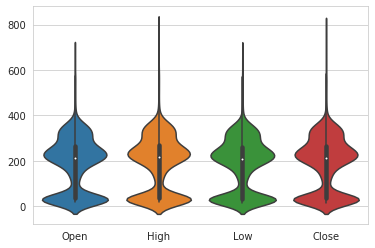

In [95]:
sns.violinplot(data=tesla.iloc[:,:-1])

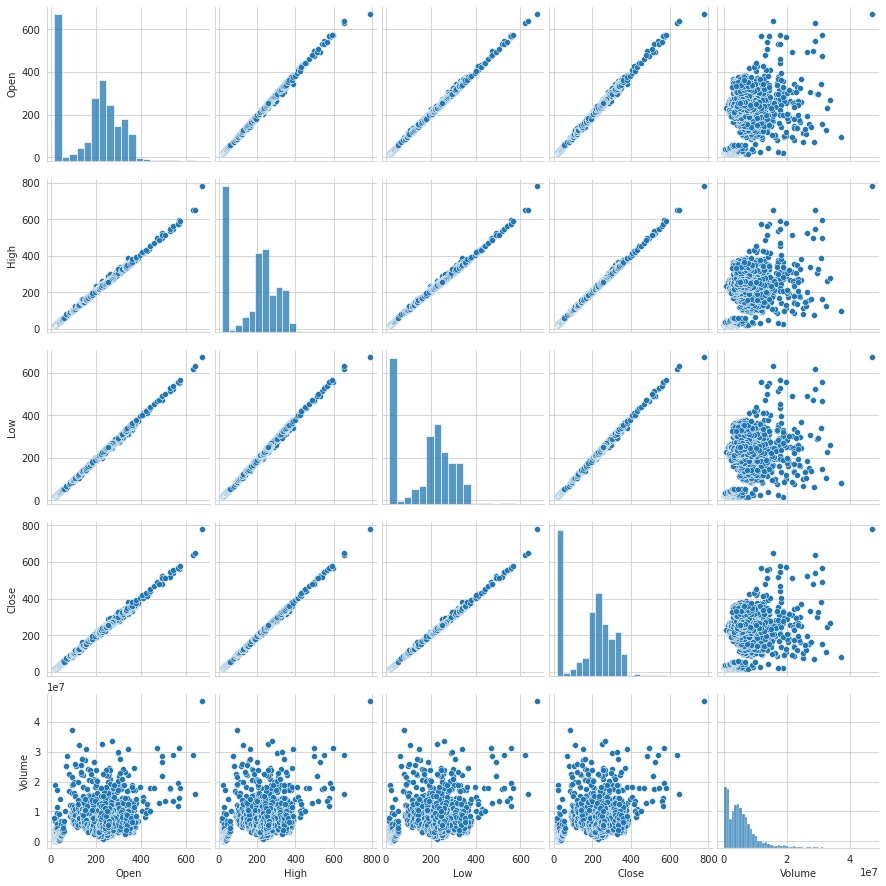

In [96]:
sns.pairplot(tesla)

### Gradient Descent

In [97]:
features=['Open','High','Low','Volume']
X3=tesla[features]
y3=tesla['Close']

In [98]:
#split training and testing data (train - test follows ratio 7:3, random state = student id = 21522883)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3,test_size = 0.3,random_state=21522883)

In [99]:
#standardize data
scaler = MinMaxScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.fit_transform(X_test3)

In [100]:
X_train3

array([[0.23868907, 0.20678094, 0.23492878, 0.18632043],
       [0.49530832, 0.43530299, 0.49090412, 0.11695721],
       [0.00643297, 0.00599083, 0.00809366, 0.00737576],
       ...,
       [0.006874  , 0.00554899, 0.00686367, 0.02368724],
       [0.31095734, 0.26636431, 0.30768063, 0.06737064],
       [0.18859401, 0.16467623, 0.18908494, 0.19494076]])

In [136]:
#Gradient Descent
class LinearRegression_GD:
  def __init__ (self, eta = 0.01, max_iter = 200, random_state = 21522883):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = [ ]
  def net_input(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]
  def predict(self, X):
    return self.net_input(X)
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = [ ]
    for n_iters in range (self.max_iter):
      errors = y - self.predict(X)
      self.w[1:] += self.eta * X.T.dot(errors)
      self.w[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2
      self.costs.append(cost)

In [137]:
model_GD3 =LinearRegression_GD(eta=0.0009, max_iter=200, random_state=21522883)
model_GD3.fit(X_train3, y_train3)
Y_pred3 = model_GD3.predict(X_test3)
accuracy_mse_tesla_gd = mean_squared_error(y_test3,Y_pred3)
accuracy_mse_tesla_gd

587.6239707396193

In [138]:
accuracy_r2_tesla_gd = r2_score(y_test3,Y_pred3)
print("Final R2:" ,accuracy_r2_tesla_gd)

Final R2: 0.9570648652460229


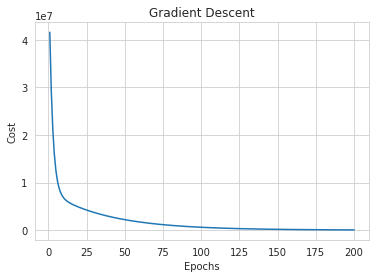

In [117]:
#Cost funtion
plt.plot(range(1, len(model_GD3.costs) + 1), model_GD3.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Normal Equation

In [118]:
model3=LinearRegression()
model3.fit(X_train3, y_train3)  
Y_pred3 = model3.predict(X_test3)

In [119]:
accuracy_mse_tesla_ne = mean_squared_error(y_test3,Y_pred3)
accuracy_mse_tesla_ne

1890.8366166057922

In [120]:
accuracy_r2_tesla_ne = r2_score(y_test3,Y_pred3)
accuracy_r2_tesla_ne

0.8618447698286685